In [12]:
import pandas as pan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plotter
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [2]:
matrix_data = pan.read_csv("cement_slump.csv")

In [5]:
matrix_data.info()
matrix_data.isna().sum().sum()
matrix_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


<Axes: >

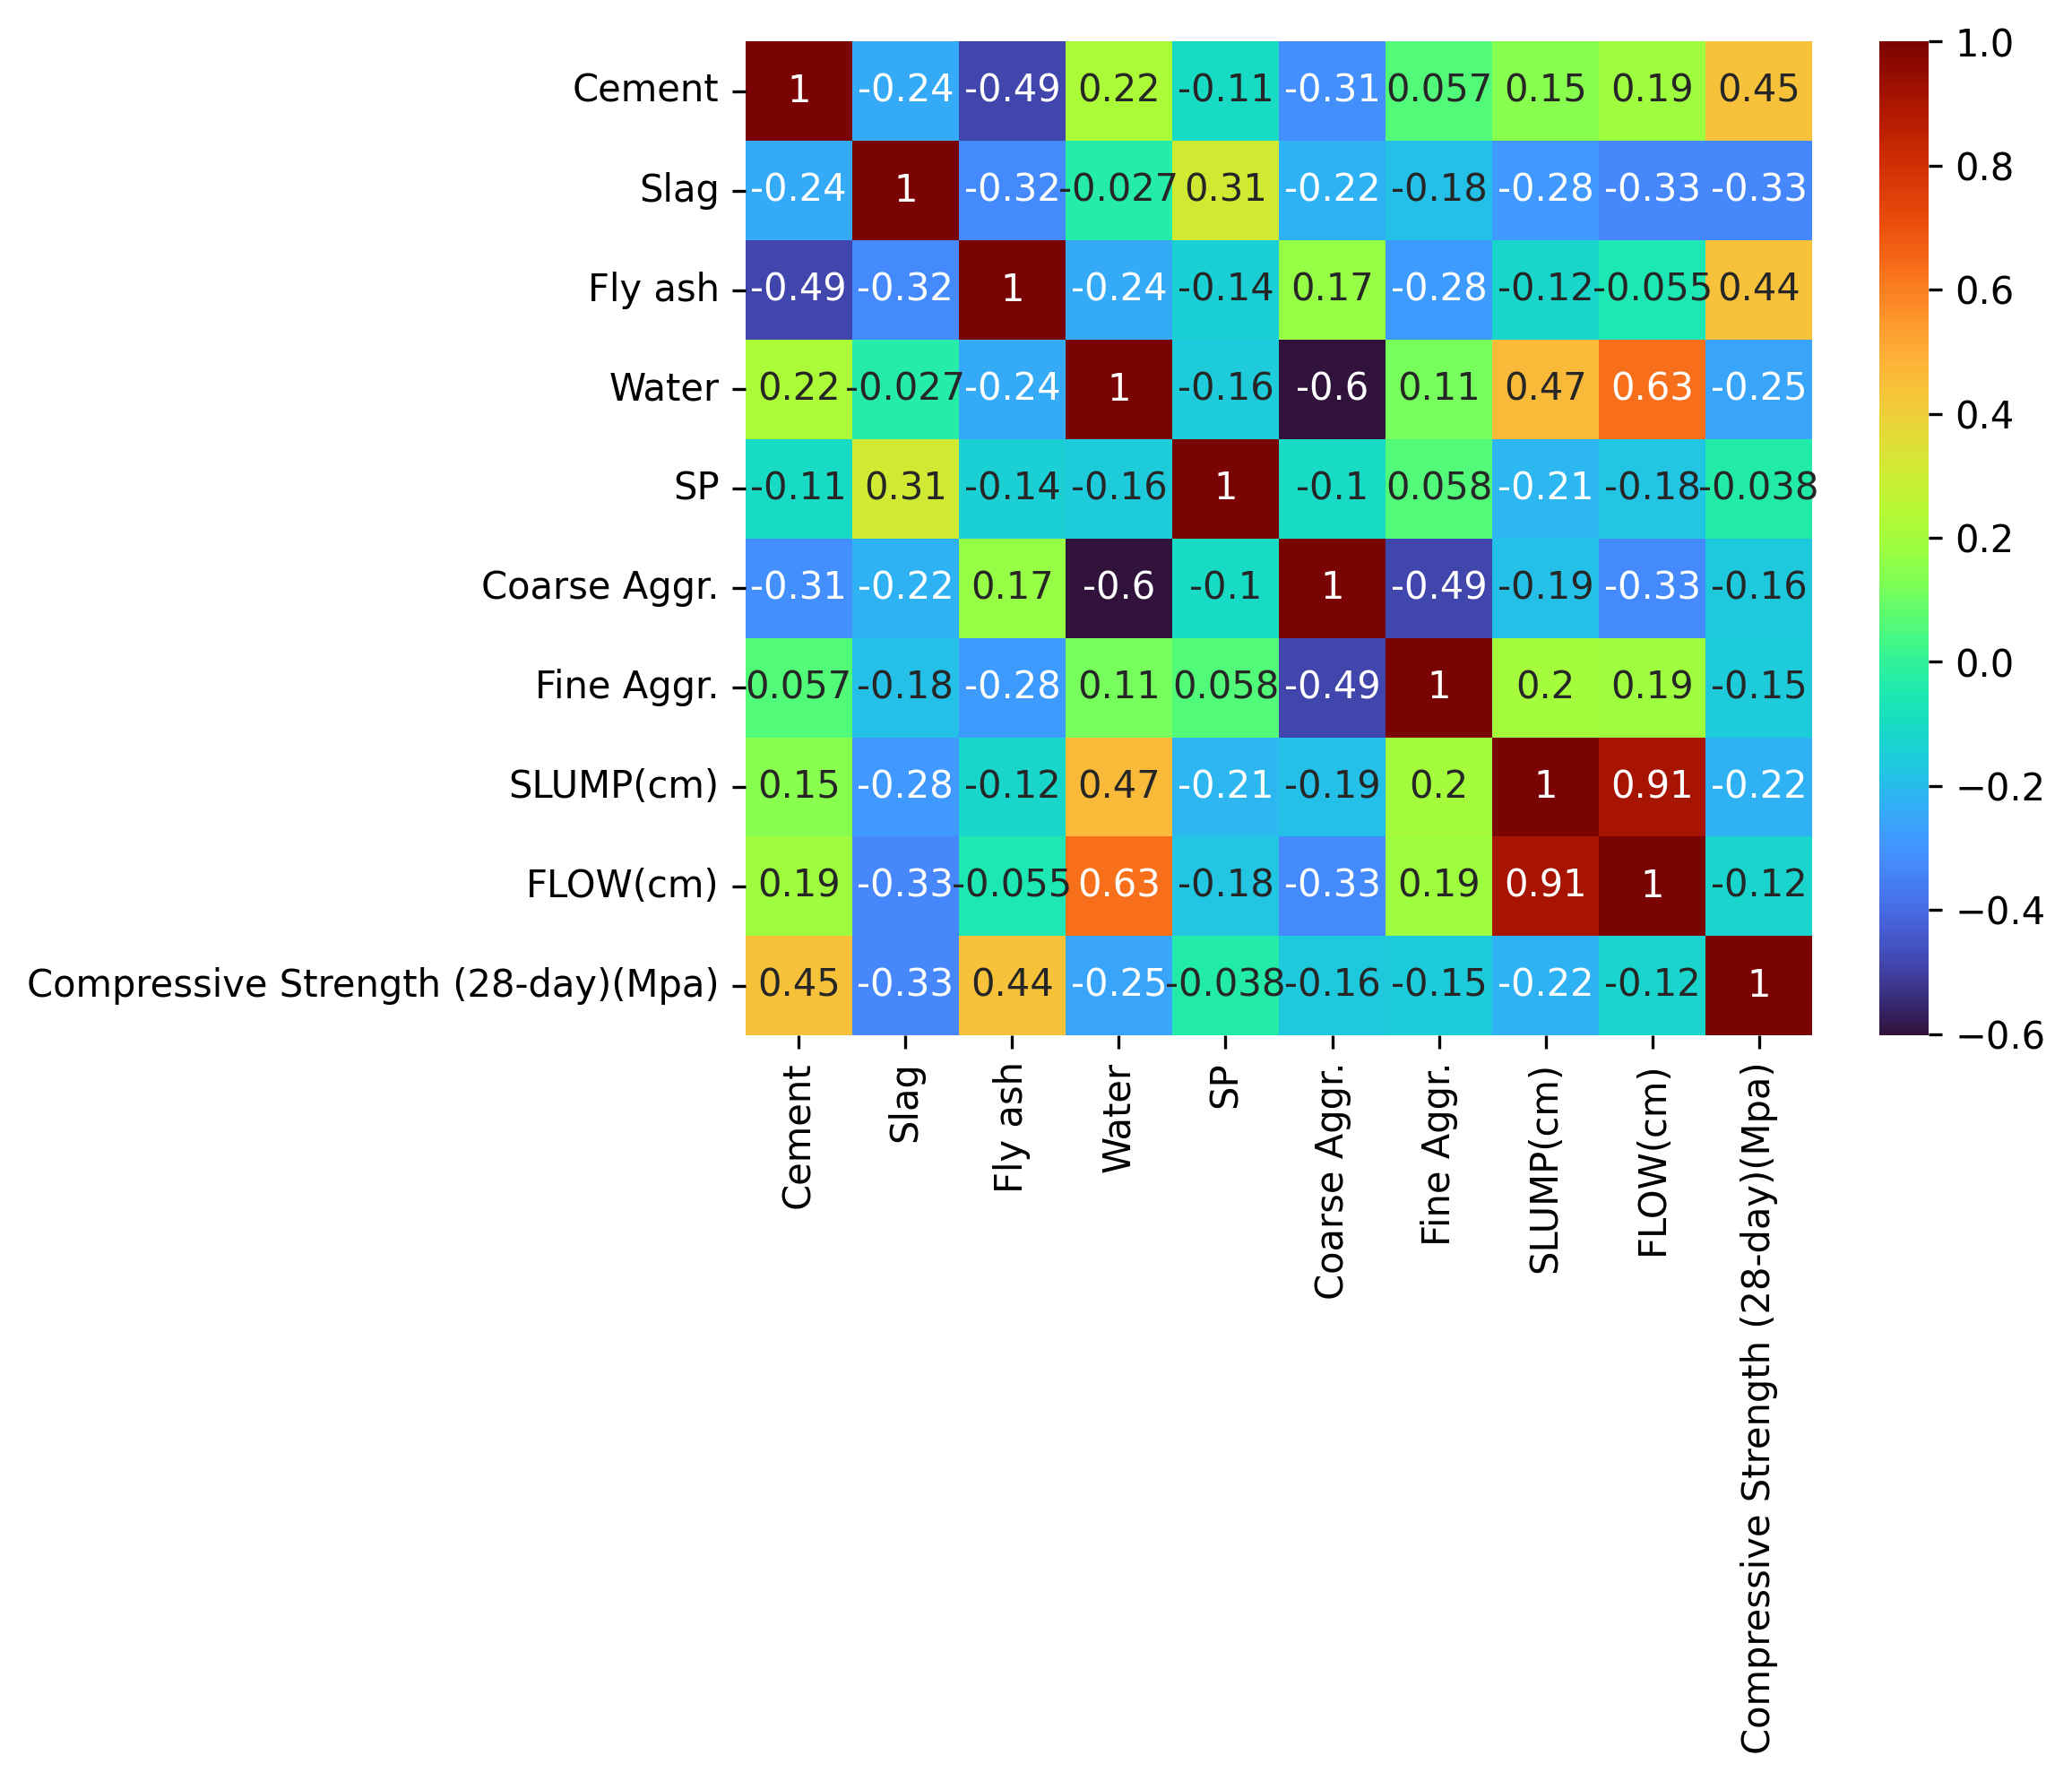

In [8]:
plotter.figure(dpi = 300)
sns.heatmap(matrix_data.corr(), cmap = "turbo", annot = True)

In [11]:
features = matrix_data.drop("Compressive Strength (28-day)(Mpa)", axis = 1)
label = matrix_data["Compressive Strength (28-day)(Mpa)"]

In [13]:
scaler = StandardScaler()
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.2, random_state = 42)
svr_learner = SVR()
order_of_operations = [("scale", scaler), ("model", svr_learner)]
piper = Pipeline(order_of_operations)
params = {"model__C": [0.0001, 0.001, 0.01, 0.1, 0.5, 1], "model__kernel": ["linear", "rbf", "poly"], "model__gamma": ["auto", "scale"], "model__degree": [2, 3, 4], "model__epsilon": [0, 0.1, 0.5, 1, 2]}
gridder = GridSearchCV(piper, params, cv = 3, verbose = 1, scoring = "neg_mean_squared_error")

In [15]:
gridder.fit(feature_train, label_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
                         'model__degree': [2, 3, 4],
                         'model__epsilon': [0, 0.1, 0.5, 1, 2],
                         'model__gamma': ['auto', 'scale'],
                         'model__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

In [16]:
gridder.best_params_

{'model__C': 1,
 'model__degree': 2,
 'model__epsilon': 1,
 'model__gamma': 'auto',
 'model__kernel': 'linear'}

In [18]:
predictions = gridder.predict(feature_test)
mean_absolute_error(label_test, predictions)

2.0357300167844334

In [19]:
np.sqrt(mean_squared_error(label_test, predictions))

2.4879089180533107